# Multiple-objective portfolio optimization

# INTRODUCTION

-  Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.
-  Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [23]:
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Example

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [24]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [25]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [26]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [27]:
b = matrix(1.0) 

In [28]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [29]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [30]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [31]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [32]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.875000000000018


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Example

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [33]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [34]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [35]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.4999999895543077


# Portfolio optimization

In [36]:
import os
import glob
import matplotlib.pyplot as plt

dataPath = "./Bundle1"

class Index:
    def __init__(self,name,runx,runy):
        self.name = name
        self.datax = runx
        self.datay = runy
        self.increase = 0
        self.pred_datax = []
        self.pred_datay = []
        
    def __str__(self) -> str:
        return self.name
    
stock_data=[]

for file in glob.glob(os.path.join(dataPath, "*.txt")):
    with open(file,'r') as rf:
        data = rf.readlines()
        stock_data.append(Index(data[0], [float(i.split()[0]) for i in data[2:]], [float(i.split()[1]) for i in data[2:]]))

## Predictions

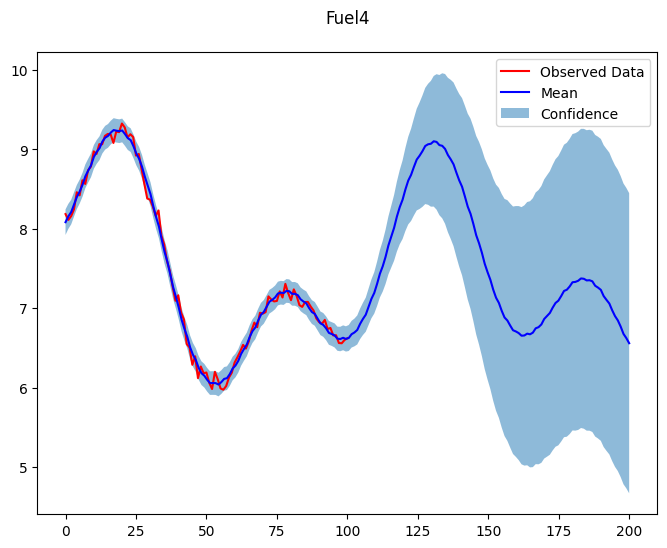

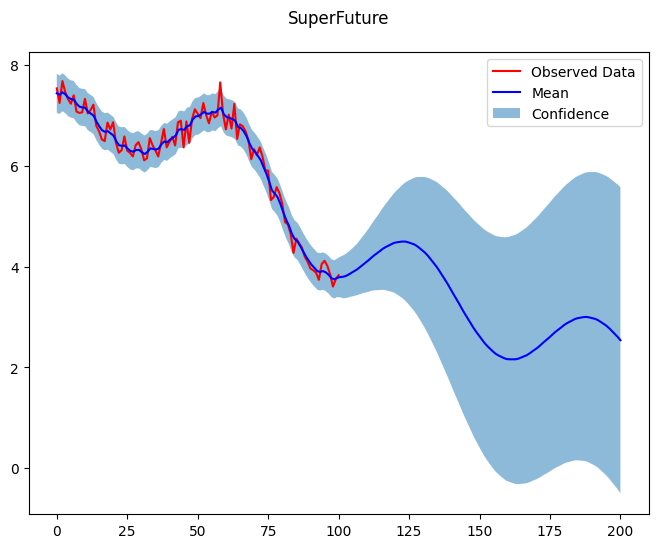

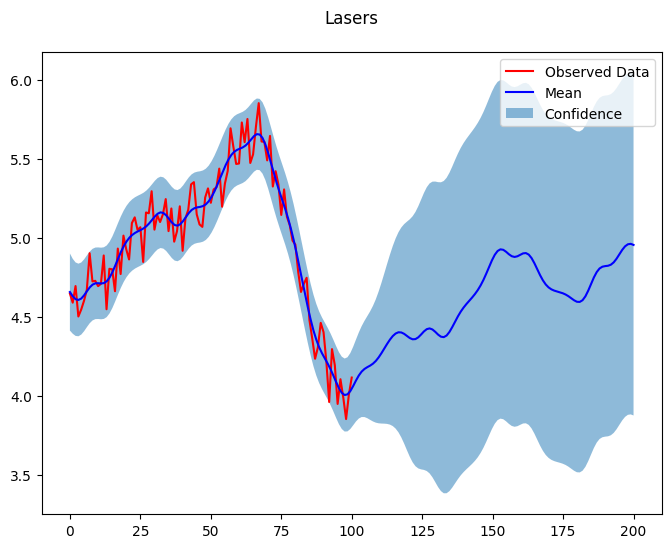

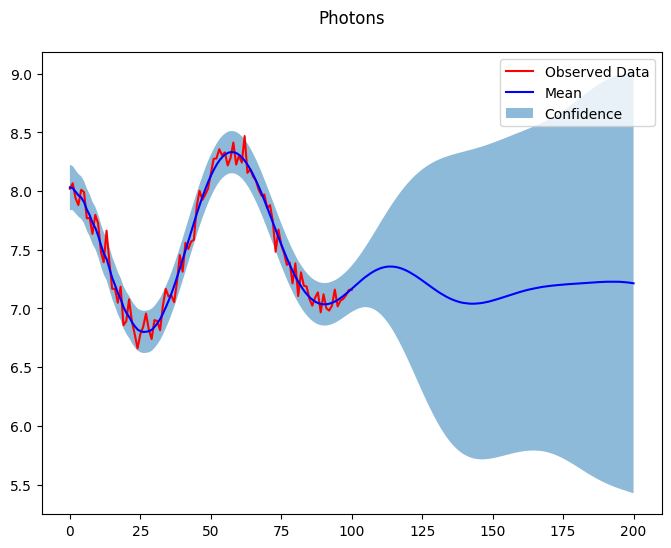

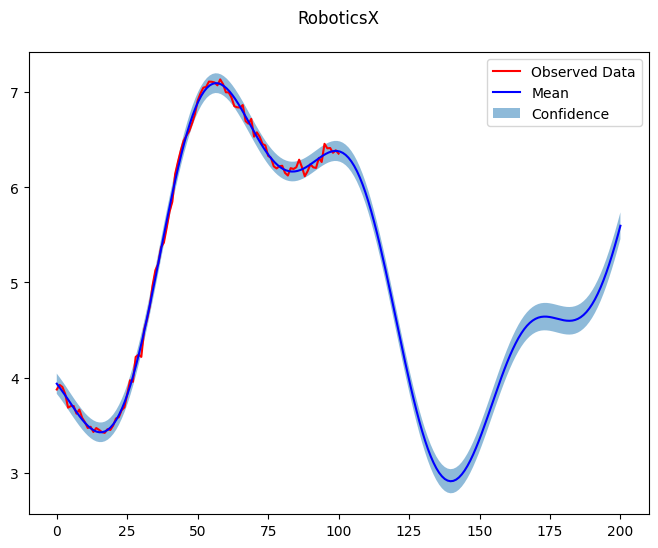

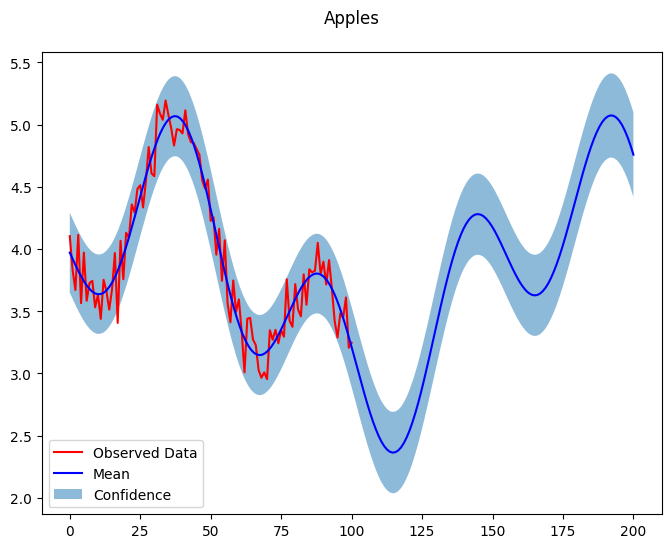

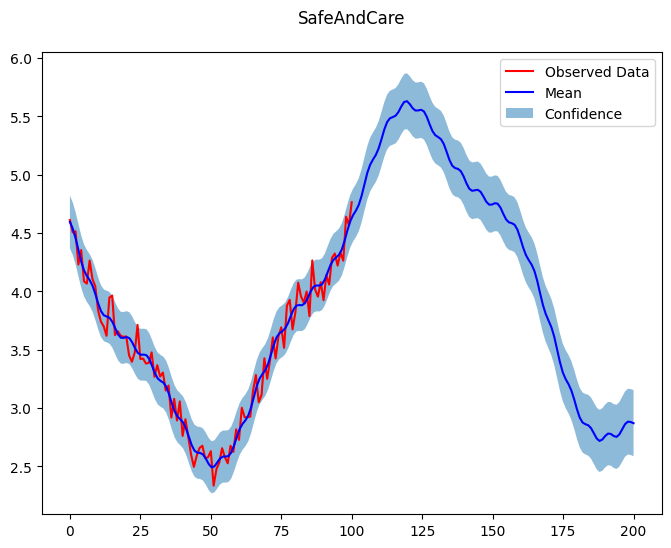

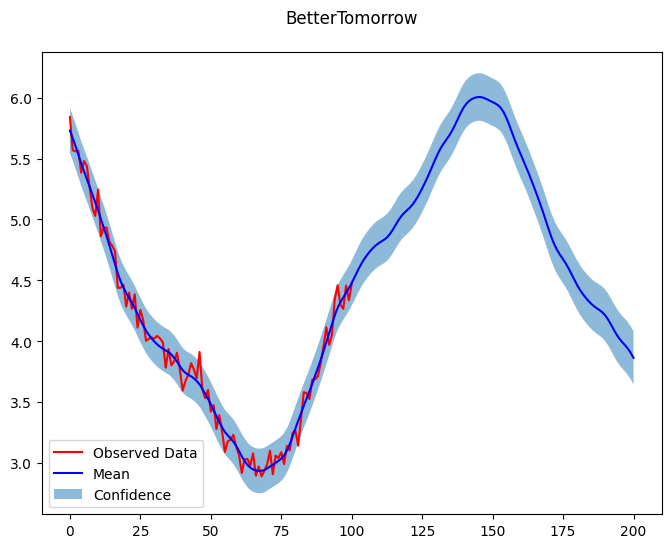

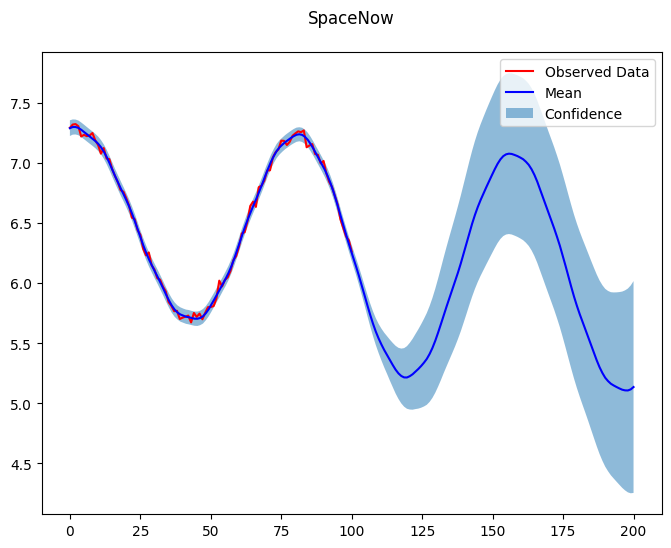

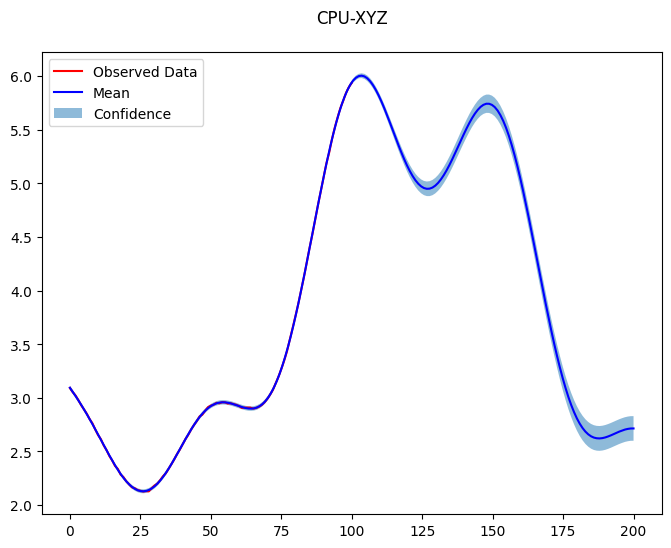

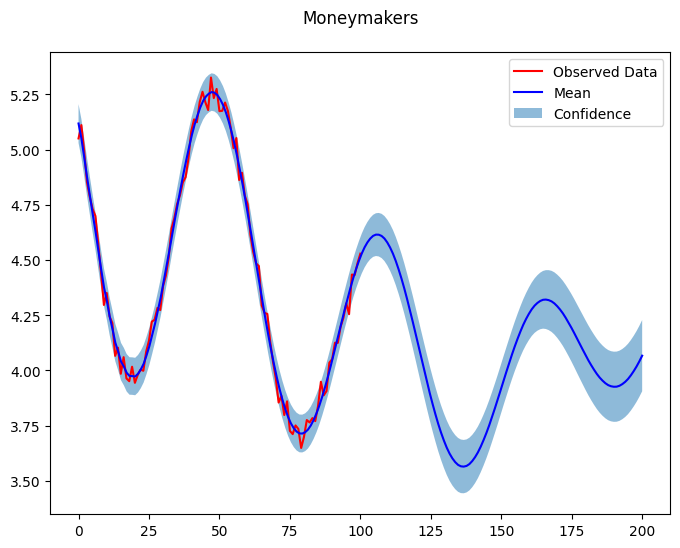

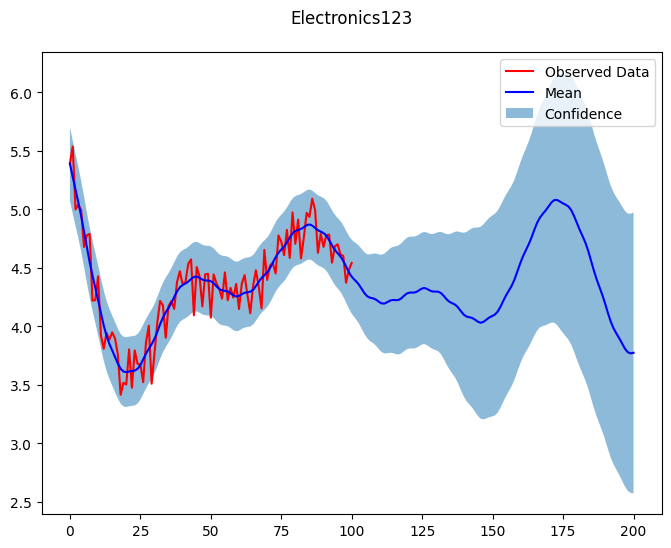

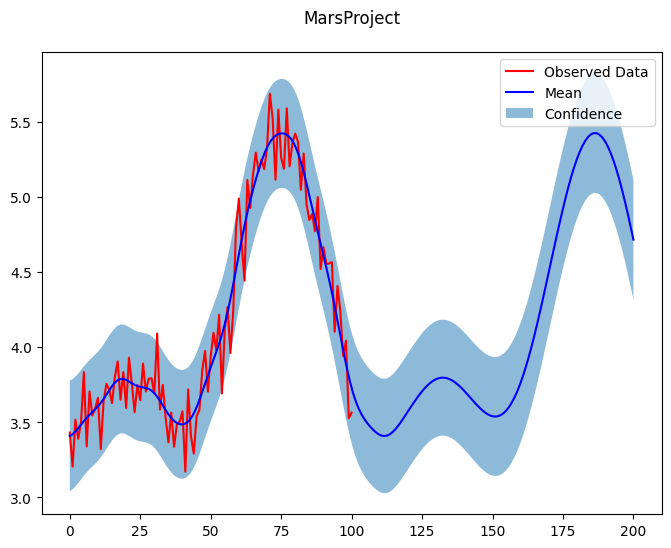

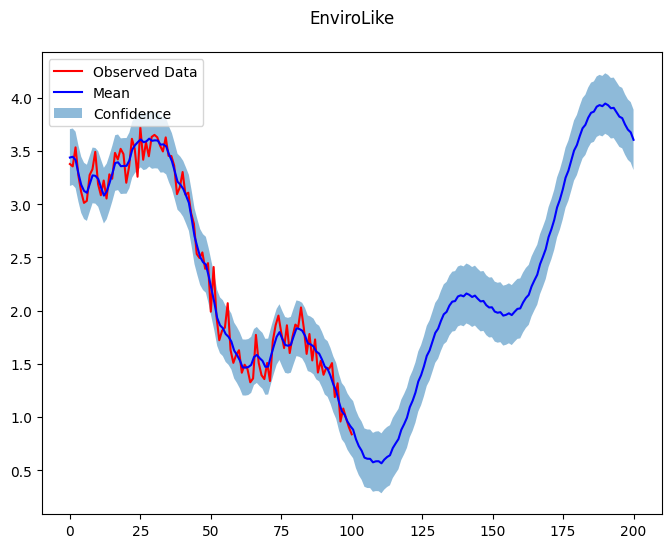

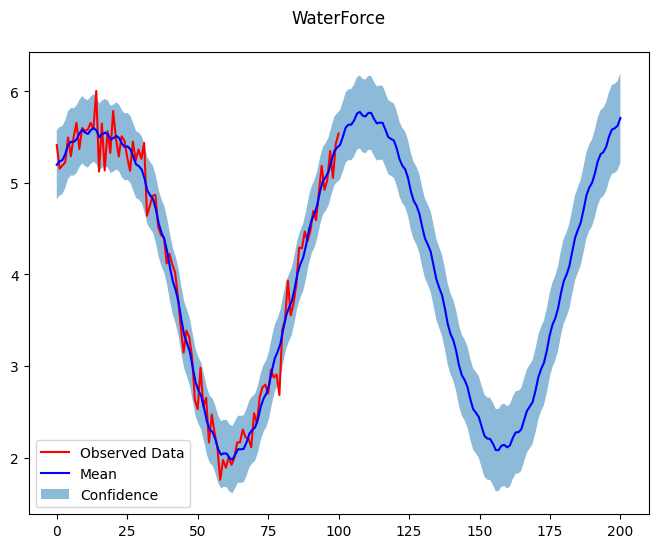

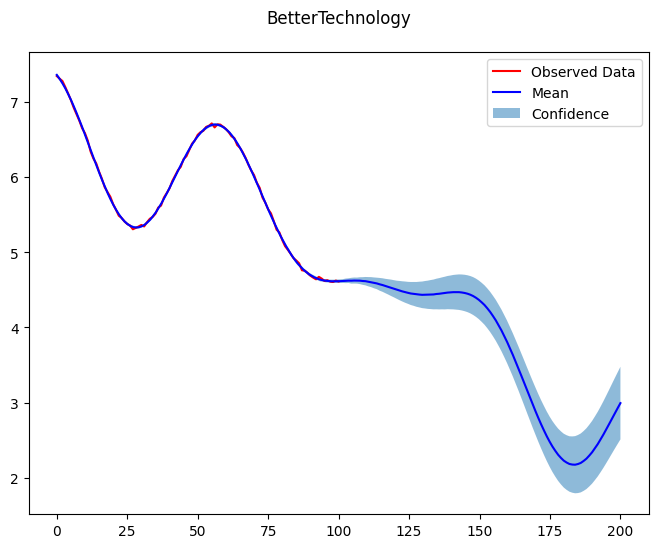

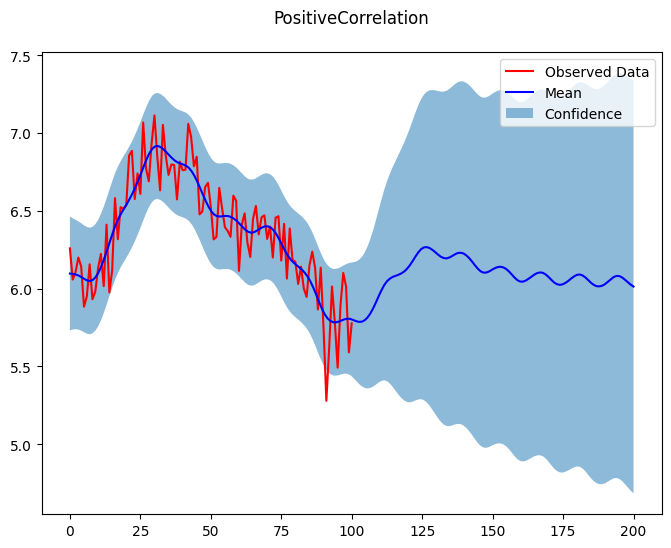

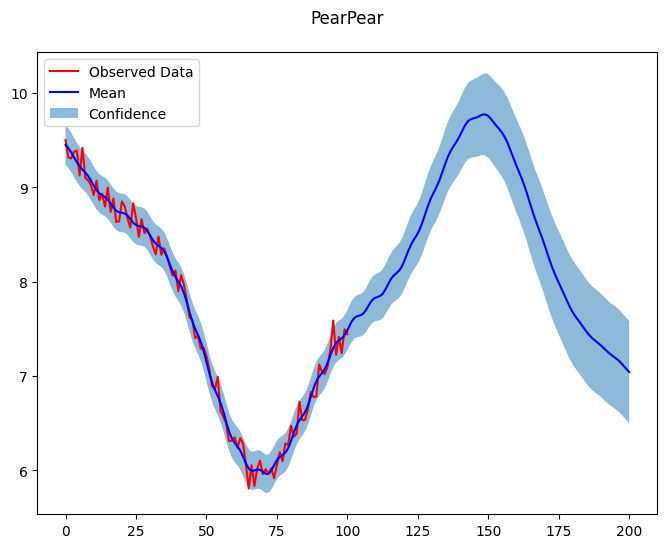

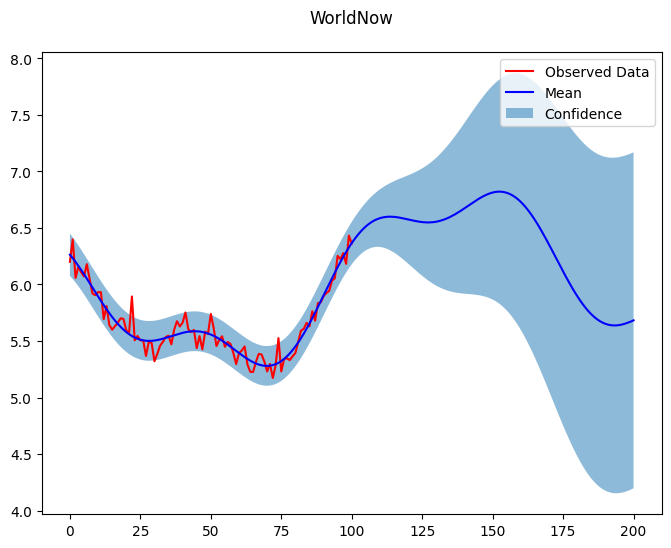

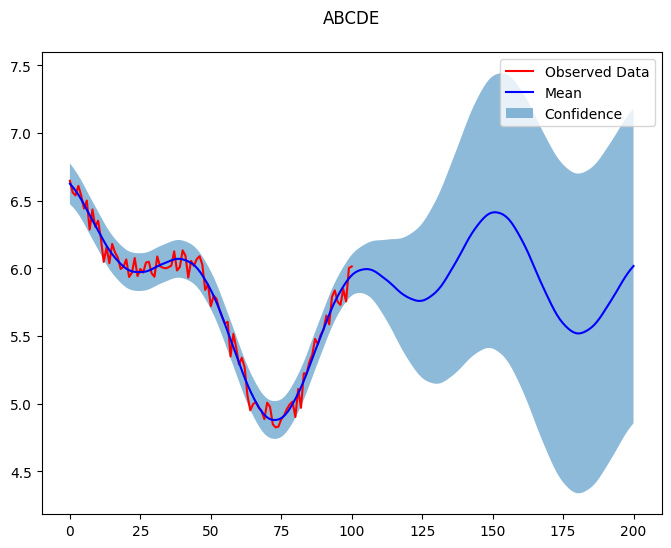

In [37]:
import gpytorch
import numpy as np
import torch

class PredictorGP(gpytorch.models.ExactGP):
    def __init__(self, x_train, y_train, likelihood):
        super(PredictorGP, self).__init__(x_train, y_train, likelihood)
        self.mean = gpytorch.means.ConstantMean() 
        self.cov = gpytorch.kernels.SpectralMixtureKernel(num_mixtures=9) 
        self.cov.initialize_from_data(x_train, y_train) 
        
    def forward(self, x):
        # Evaluate the mean and kernel function at x
        mean_x = self.mean(x)
        cov_x = self.cov(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, cov_x) 
        
for company in stock_data:
    # Initialize the likelihood and model
    x = torch.Tensor(company.datax)
    y = torch.Tensor(company.datay)
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = PredictorGP(x, y, likelihood)
    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    n_iter = 1200
    for i in range(n_iter):
        optimizer.zero_grad()
        output = model(x)
        loss = -mll(output, y)
        loss.backward()
        optimizer.step()
    x_test = torch.linspace(0, 200, 200)

    model.eval()
    likelihood.eval()

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        f_preds = model(x_test)
        f_mean = f_preds.mean
        f_cov = f_preds.covariance_matrix
        
        observed_pred = likelihood(model(x_test))
        
        f, ax = plt.subplots(1, 1, figsize=(8, 6))

        lower, upper = observed_pred.confidence_region()
        plt.title(company.name)

        ax.plot(x.numpy(), y.numpy(), 'r-')

        company.pred_datax=list(x_test.numpy())
        company.pred_datay=list(observed_pred.mean.numpy())
        ax.plot(x_test.numpy(), observed_pred.mean.numpy(), 'b')

        ax.fill_between(x_test.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)

        ax.legend(['Observed Data', 'Mean', 'Confidence'])
        plt.show()

In [38]:
for company in stock_data:
    company.increase = (company.pred_datay[-1] - company.datay[-1]) / company.datay[-1]

risk_matrix = [[np.cov(np.stack((stock_data[i].datay, stock_data[j].datay), axis=0))[0][1]  for i in range(len(stock_data))] for j in range(len(stock_data))]

## Model

$
\begin{cases}
\displaystyle max \sum_{i=1}^n w_ir_i \\
\displaystyle min \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i \\
\end{cases}
$ <br>

$ \displaystyle \sum_{i=1}^n w_i = 1 $ <br>
$ \displaystyle w_i \in [0,1] \ \forall_{i}$ <br>

## Weighted Sum Method

$ \displaystyle min f_{s} = - w_{1}^{\star} \sum_{i=1}^n w_ir_i + w_{2}^{\star} \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i $ <br>

### Solution when only risk matters

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

In [39]:
def WSM(weights):
    Q = 2.0 * matrix([[weights[0] * risk_matrix[i][j] for i in range(len(stock_data))] for j in range(len(stock_data))])
    c = matrix([-weights[1] * float(i.increase) for i in stock_data])
    G = matrix([[0.0 if j != i else -1.0 for j in range(len(stock_data))] for i in range(len(stock_data))])
    h = matrix([0.0 for i in stock_data])
    A = matrix([1.0 for j in range(len(stock_data))], (1, len(stock_data)))
    b = matrix(1.0)
    
    return solvers.qp(Q, c, G, h, A, b)

In [40]:
weights = [1.0, 0.0]
solLP = WSM(weights)

print(solLP['x'])
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0:  4.2439e-03 -1.0325e+00  1e+00  2e-16  5e+00
 1:  3.7472e-03 -2.2798e-02  3e-02  5e-17  1e-01
 2:  1.4874e-03 -4.1056e-03  6e-03  2e-16  1e-02
 3:  8.1700e-04 -7.1015e-05  9e-04  7e-17  1e-03
 4:  6.5375e-04  4.7811e-04  2e-04  8e-17  2e-16
 5:  6.1755e-04  5.9336e-04  2e-05  2e-16  2e-16
 6:  6.0767e-04  6.0605e-04  2e-06  2e-16  3e-16
 7:  6.0684e-04  6.0681e-04  3e-08  1e-16  2e-16
Optimal solution found.
[ 2.53e-01]
[ 6.47e-06]
[ 9.03e-02]
[ 5.73e-02]
[ 2.11e-01]
[ 1.98e-02]
[ 5.68e-07]
[ 1.62e-06]
[ 2.96e-02]
[ 8.95e-02]
[ 4.03e-02]
[ 2.57e-07]
[ 2.33e-02]
[ 5.89e-02]
[ 5.31e-06]
[ 1.82e-05]
[ 1.28e-02]
[ 1.40e-02]
[ 8.36e-05]
[ 1.00e-01]

0.0006068407265176153


### Solution when only return matters

In [41]:
weights = [0.0, 1.0]
solLP = WSM(weights)

print(solLP['x'])
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -1.1983e+01 -4.3002e+00  1e+02  7e+00  5e+00
 1: -1.4572e+00 -4.1275e+00  3e+00  1e-14  1e-15
 2: -3.2499e+00 -3.5057e+00  3e-01  2e-16  1e-15
 3: -3.2995e+00 -3.3022e+00  3e-03  1e-16  8e-16
 4: -3.3002e+00 -3.3002e+00  3e-05  4e-16  8e-16
 5: -3.3002e+00 -3.3002e+00  3e-07  3e-16  8e-16
Optimal solution found.
[ 9.27e-10]
[ 1.27e-09]
[ 7.46e-10]
[ 9.10e-10]
[ 1.04e-09]
[ 6.50e-10]
[ 1.34e-09]
[ 1.05e-09]
[ 1.10e-09]
[ 1.49e-09]
[ 1.02e-09]
[ 1.09e-09]
[ 6.78e-10]
[ 1.00e+00]
[ 8.89e-10]
[ 1.28e-09]
[ 8.79e-10]
[ 9.71e-10]
[ 1.02e-09]
[ 9.17e-10]

-3.3001805322645192


### Pareto fronts

     pcost       dcost       gap    pres   dres
 0: -1.1983e+01 -4.3002e+00  1e+02  7e+00  5e+00
 1: -1.4572e+00 -4.1275e+00  3e+00  1e-14  1e-15
 2: -3.2499e+00 -3.5057e+00  3e-01  2e-16  1e-15
 3: -3.2995e+00 -3.3022e+00  3e-03  1e-16  8e-16
 4: -3.3002e+00 -3.3002e+00  3e-05  4e-16  8e-16
 5: -3.3002e+00 -3.3002e+00  3e-07  3e-16  8e-16
Optimal solution found.
-3.3001805322645192
     pcost       dcost       gap    pres   dres
 0: -8.4625e+00 -4.0098e+00  1e+02  7e+00  5e+00
 1: -1.5758e+00 -3.6295e+00  2e+00  2e-02  2e-02
 2: -2.8153e+00 -2.9027e+00  9e-02  1e-16  1e-15
 3: -2.8884e+00 -2.8893e+00  9e-04  2e-16  1e-15
 4: -2.8891e+00 -2.8891e+00  9e-06  2e-16  1e-15
 5: -2.8891e+00 -2.8891e+00  9e-08  1e-16  8e-16
Optimal solution found.
-2.8891464351058955
     pcost       dcost       gap    pres   dres
 0: -6.2597e+00 -3.6035e+00  9e+01  6e+00  5e+00
 1: -1.2748e+00 -3.2323e+00  2e+00  3e-02  3e-02
 2: -2.2695e+00 -2.4865e+00  2e-01  2e-03  2e-03
 3: -2.4759e+00 -2.4782e+00  3e-0

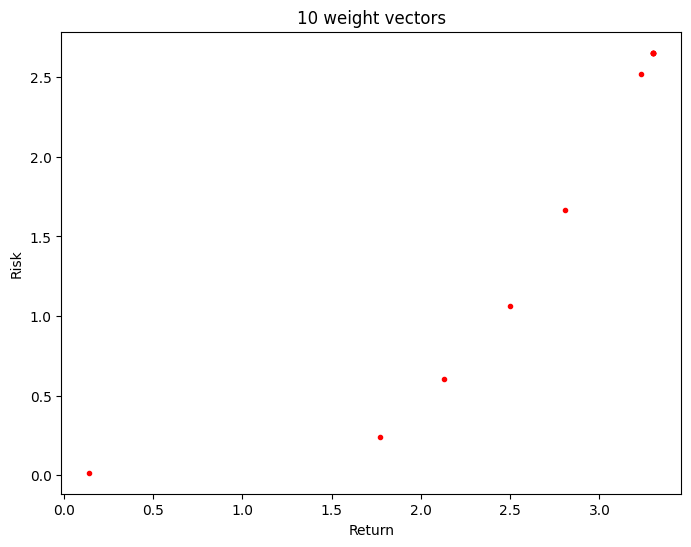

     pcost       dcost       gap    pres   dres
 0: -1.1983e+01 -4.3002e+00  1e+02  7e+00  5e+00
 1: -1.4572e+00 -4.1275e+00  3e+00  1e-14  1e-15
 2: -3.2499e+00 -3.5057e+00  3e-01  2e-16  1e-15
 3: -3.2995e+00 -3.3022e+00  3e-03  1e-16  8e-16
 4: -3.3002e+00 -3.3002e+00  3e-05  4e-16  8e-16
 5: -3.3002e+00 -3.3002e+00  3e-07  3e-16  8e-16
Optimal solution found.
-3.3001805322645192
     pcost       dcost       gap    pres   dres
 0: -1.1475e+01 -4.3041e+00  1e+02  7e+00  5e+00
 1: -1.4923e+00 -4.0636e+00  3e+00  2e-15  1e-15
 2: -3.2119e+00 -3.4419e+00  2e-01  4e-16  2e-15
 3: -3.2585e+00 -3.2609e+00  2e-03  4e-16  1e-15
 4: -3.2591e+00 -3.2591e+00  2e-05  2e-16  1e-15
 5: -3.2591e+00 -3.2591e+00  2e-07  4e-16  1e-15
Optimal solution found.
-3.2590771299847177
     pcost       dcost       gap    pres   dres
 0: -1.1029e+01 -4.2907e+00  1e+02  7e+00  5e+00
 1: -1.5354e+00 -4.0043e+00  2e+00  4e-15  2e-15
 2: -3.1745e+00 -3.3741e+00  2e-01  1e-16  2e-15
 3: -3.2175e+00 -3.2195e+00  2e-0

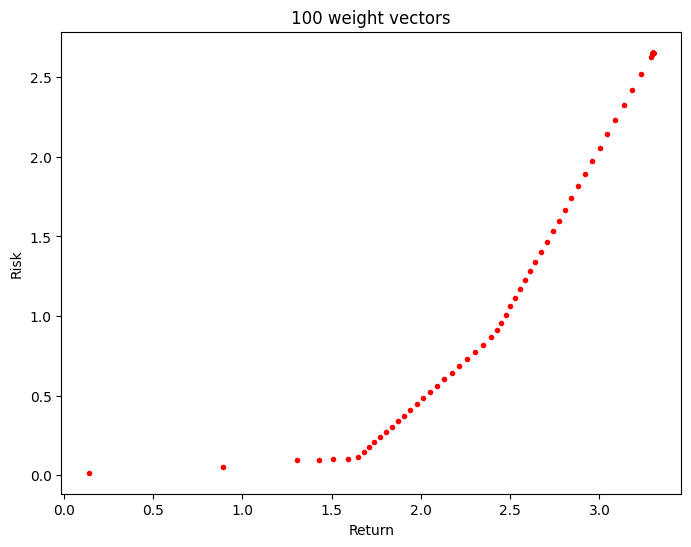

     pcost       dcost       gap    pres   dres
 0: -1.1983e+01 -4.3002e+00  1e+02  7e+00  5e+00
 1: -1.4572e+00 -4.1275e+00  3e+00  1e-14  1e-15
 2: -3.2499e+00 -3.5057e+00  3e-01  2e-16  1e-15
 3: -3.2995e+00 -3.3022e+00  3e-03  1e-16  8e-16
 4: -3.3002e+00 -3.3002e+00  3e-05  4e-16  8e-16
 5: -3.3002e+00 -3.3002e+00  3e-07  3e-16  8e-16
Optimal solution found.
-3.3001805322645192
     pcost       dcost       gap    pres   dres
 0: -1.1720e+01 -4.3050e+00  1e+02  7e+00  5e+00
 1: -1.4725e+00 -4.0949e+00  3e+00  3e-15  1e-15
 2: -3.2307e+00 -3.4751e+00  2e-01  2e-16  2e-15
 3: -3.2790e+00 -3.2816e+00  3e-03  1e-16  2e-15
 4: -3.2796e+00 -3.2796e+00  3e-05  2e-16  1e-15
 5: -3.2796e+00 -3.2796e+00  3e-07  1e-16  1e-15
Optimal solution found.
-3.2796288307707604
     pcost       dcost       gap    pres   dres
 0: -1.1475e+01 -4.3041e+00  1e+02  7e+00  5e+00
 1: -1.4923e+00 -4.0636e+00  3e+00  2e-15  1e-15
 2: -3.2119e+00 -3.4419e+00  2e-01  4e-16  2e-15
 3: -3.2585e+00 -3.2609e+00  2e-0

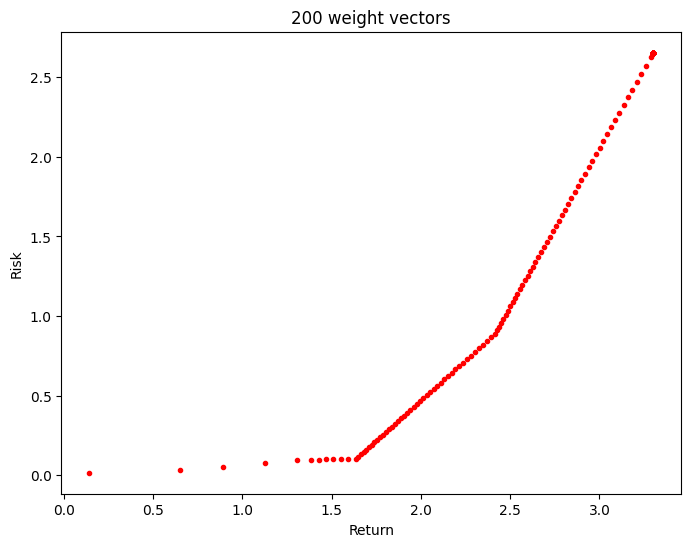

     pcost       dcost       gap    pres   dres
 0: -1.1983e+01 -4.3002e+00  1e+02  7e+00  5e+00
 1: -1.4572e+00 -4.1275e+00  3e+00  1e-14  1e-15
 2: -3.2499e+00 -3.5057e+00  3e-01  2e-16  1e-15
 3: -3.2995e+00 -3.3022e+00  3e-03  1e-16  8e-16
 4: -3.3002e+00 -3.3002e+00  3e-05  4e-16  8e-16
 5: -3.3002e+00 -3.3002e+00  3e-07  3e-16  8e-16
Optimal solution found.
-3.3001805322645192
     pcost       dcost       gap    pres   dres
 0: -1.1876e+01 -4.3029e+00  1e+02  7e+00  5e+00
 1: -1.4626e+00 -4.1143e+00  3e+00  1e-14  2e-15
 2: -3.2422e+00 -3.4939e+00  3e-01  2e-16  2e-15
 3: -3.2913e+00 -3.2940e+00  3e-03  1e-16  1e-15
 4: -3.2920e+00 -3.2920e+00  3e-05  1e-16  1e-15
 5: -3.2920e+00 -3.2920e+00  3e-07  1e-16  1e-15
Optimal solution found.
-3.291959851528515
     pcost       dcost       gap    pres   dres
 0: -1.1771e+01 -4.3045e+00  1e+02  7e+00  5e+00
 1: -1.4690e+00 -4.1013e+00  3e+00  2e-15  2e-15
 2: -3.2345e+00 -3.4815e+00  2e-01  2e-16  9e-16
 3: -3.2831e+00 -3.2857e+00  3e-03

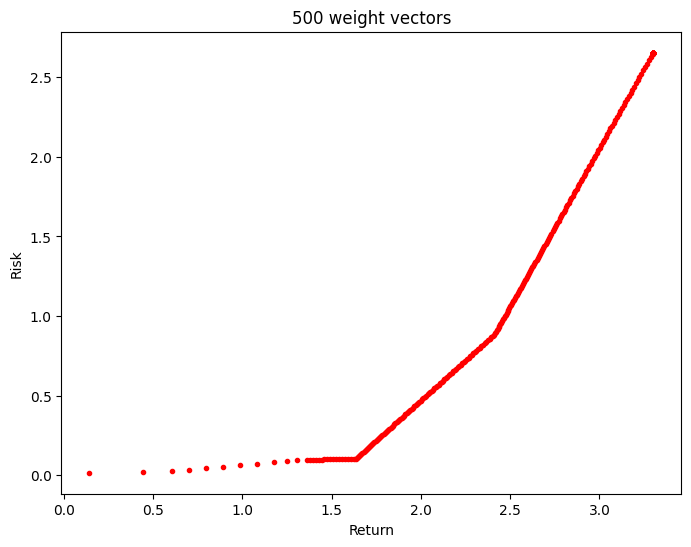

     pcost       dcost       gap    pres   dres
 0: -1.1983e+01 -4.3002e+00  1e+02  7e+00  5e+00
 1: -1.4572e+00 -4.1275e+00  3e+00  1e-14  1e-15
 2: -3.2499e+00 -3.5057e+00  3e-01  2e-16  1e-15
 3: -3.2995e+00 -3.3022e+00  3e-03  1e-16  8e-16
 4: -3.3002e+00 -3.3002e+00  3e-05  4e-16  8e-16
 5: -3.3002e+00 -3.3002e+00  3e-07  3e-16  8e-16
Optimal solution found.
-3.3001805322645192
     pcost       dcost       gap    pres   dres
 0: -1.1929e+01 -4.3017e+00  1e+02  7e+00  5e+00
 1: -1.4597e+00 -4.1208e+00  3e+00  1e-14  2e-15
 2: -3.2461e+00 -3.4999e+00  3e-01  2e-17  2e-15
 3: -3.2954e+00 -3.2981e+00  3e-03  2e-16  1e-15
 4: -3.2961e+00 -3.2961e+00  3e-05  2e-16  2e-15
 5: -3.2961e+00 -3.2961e+00  3e-07  7e-23  1e-15
Optimal solution found.
-3.296070191867942
     pcost       dcost       gap    pres   dres
 0: -1.1876e+01 -4.3029e+00  1e+02  7e+00  5e+00
 1: -1.4626e+00 -4.1143e+00  3e+00  1e-14  2e-15
 2: -3.2422e+00 -3.4939e+00  3e-01  2e-16  2e-15
 3: -3.2913e+00 -3.2940e+00  3e-03

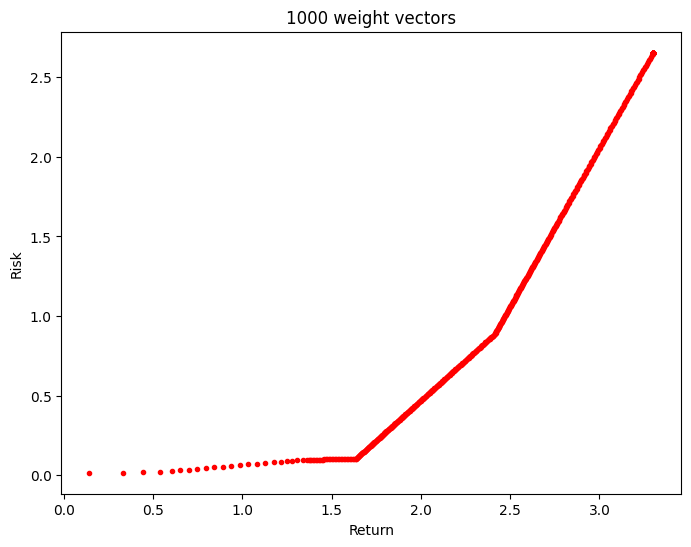

In [42]:
for splits in [10.0, 100.0, 200.0, 500.0, 1000.0]:
    weight_vector = []
    factor = 1.0 / splits
    value = 0.0
    for i in range(int(splits) + 1):
        weight_vector.append([value, round(1.0 - value, 3)])
        value = round(value + factor, 3)
        
    result=[]
    for weights in weight_vector:
        solLP = WSM(weights)
        
        f = list(solLP['x'])
        print(solLP['primal objective'])
        result.append([
                sum([float(stock_data[i].increase) * f[i] for i in range(len(stock_data))]),
                sum([sum(risk_matrix[i]) * f[i] for i in range(len(stock_data))]),
            ])
    x=[]
    y=[]
    for i in result:
        x.append(i[0])
        y.append(i[1])

    return_v = min(x) / (max(x)-min(x))
    risk_v = min(y) / (max(y)-min(y))
    result=[]
    for weights in weight_vector:
        solLP = WSM(weights)
        
        f = list(solLP['x'])
        print(solLP['primal objective'])
        
        result.append([
                sum([float(stock_data[i].increase) * f[i] for i in range(len(stock_data))]),
                sum([sum(risk_matrix[i]) * f[i] for i in range(len(stock_data))]),
            ])
    x=[]
    y=[]
    for i in result:
        x.append(i[0])
        y.append(i[1])
    f, ax = plt.subplots(1, 1, figsize=(8, 6))

    ax.plot(x, y, '.r')
    ax.set_title(f"{int(splits)} weight vectors")
    ax.set_xlabel('Return')
    ax.set_ylabel('Risk')
    plt.show()

## Epsilon-constrained method

$ \displaystyle min  f_{risk} = \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i $ <br>
$ s.t. $ <br>
$ \displaystyle \sum_{i=1}^n w_ir_i \geq return $ <br>
$ ... $

In [43]:
def ECM(epsilon):
    Q = 2.0 * matrix([[risk_matrix[i][j] for i in range(len(stock_data))] for j in range(len(stock_data))])
    c = matrix([0.0 for _ in stock_data])
    G = matrix([[0.0 if j != i else -1.0 for j in range(len(stock_data))] + [-stock_data[i].increase] for i in range(len(stock_data))])
    h = matrix([0.0 for i in stock_data] + [-epsilon])
    A = matrix([1.0 for j in range(len(stock_data))], (1, len(stock_data)))
    b = matrix(1.0)
    return solvers.qp(Q, c, G, h, A, b)

In [44]:
epsilon = 0.0
solLP = ECM(epsilon)

print(solLP['x'])
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0:  4.5335e-03 -1.0433e+00  1e+00  0e+00  7e+00
 1:  3.9994e-03 -2.5832e-02  3e-02  6e-17  2e-01
 2:  1.5429e-03 -4.3379e-03  6e-03  2e-16  2e-02
 3:  8.4874e-04 -7.8512e-05  9e-04  2e-16  2e-03
 4:  6.5986e-04  3.4501e-04  3e-04  2e-16  1e-16
 5:  6.1996e-04  5.8712e-04  3e-05  7e-17  3e-16
 6:  6.0811e-04  6.0510e-04  3e-06  1e-16  3e-16
 7:  6.0686e-04  6.0680e-04  6e-08  7e-17  3e-16
Optimal solution found.
[ 2.53e-01]
[ 1.51e-05]
[ 9.03e-02]
[ 5.72e-02]
[ 2.11e-01]
[ 1.99e-02]
[ 1.25e-06]
[ 3.63e-06]
[ 2.96e-02]
[ 8.95e-02]
[ 4.02e-02]
[ 5.85e-07]
[ 2.33e-02]
[ 5.89e-02]
[ 9.96e-06]
[ 4.80e-05]
[ 1.28e-02]
[ 1.40e-02]
[ 1.45e-04]
[ 1.00e-01]

0.0006068614922996292


     pcost       dcost       gap    pres   dres
 0:  4.5335e-03 -1.0433e+00  1e+00  0e+00  7e+00
 1:  3.9994e-03 -2.5832e-02  3e-02  6e-17  2e-01
 2:  1.5429e-03 -4.3379e-03  6e-03  2e-16  2e-02
 3:  8.4874e-04 -7.8512e-05  9e-04  2e-16  2e-03
 4:  6.5986e-04  3.4501e-04  3e-04  2e-16  1e-16
 5:  6.1996e-04  5.8712e-04  3e-05  7e-17  3e-16
 6:  6.0811e-04  6.0510e-04  3e-06  1e-16  3e-16
 7:  6.0686e-04  6.0680e-04  6e-08  7e-17  3e-16
Optimal solution found.
0.0006068614922996292
     pcost       dcost       gap    pres   dres
 0:  4.2747e-03 -1.0114e+00  2e+01  5e+00  7e+00
 1:  1.7715e-02 -9.3187e-01  1e+00  1e-01  2e-01
 2:  1.0825e-02 -1.1672e-01  1e-01  2e-16  9e-16
 3:  5.6105e-03 -1.0324e-02  2e-02  3e-16  2e-16
 4:  1.2524e-03 -1.0360e-02  1e-02  1e-16  4e-16
 5:  9.9968e-04 -3.8378e-04  1e-03  1e-16  3e-16
 6:  8.3983e-04  5.3623e-04  3e-04  2e-16  2e-16
 7:  7.7230e-04  7.1066e-04  6e-05  2e-16  2e-16
 8:  7.5281e-04  7.4776e-04  5e-06  1e-16  2e-16
 9:  7.4982e-04  7.4949e-

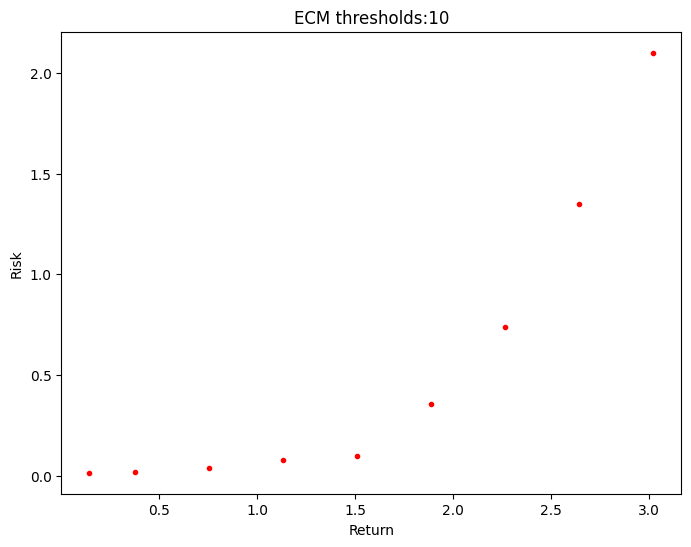

     pcost       dcost       gap    pres   dres
 0:  4.5335e-03 -1.0433e+00  1e+00  0e+00  7e+00
 1:  3.9994e-03 -2.5832e-02  3e-02  6e-17  2e-01
 2:  1.5429e-03 -4.3379e-03  6e-03  2e-16  2e-02
 3:  8.4874e-04 -7.8512e-05  9e-04  2e-16  2e-03
 4:  6.5986e-04  3.4501e-04  3e-04  2e-16  1e-16
 5:  6.1996e-04  5.8712e-04  3e-05  7e-17  3e-16
 6:  6.0811e-04  6.0510e-04  3e-06  1e-16  3e-16
 7:  6.0686e-04  6.0680e-04  6e-08  7e-17  3e-16
Optimal solution found.
0.0006068614922996292
     pcost       dcost       gap    pres   dres
 0:  4.1524e-03 -1.0246e+00  2e+01  5e+00  7e+00
 1:  1.4076e-02 -9.4451e-01  1e+00  9e-02  1e-01
 2:  8.5444e-03 -8.8940e-02  1e-01  1e-03  2e-03
 3:  4.8962e-03 -1.1705e-02  2e-02  2e-04  3e-04
 4:  9.7238e-04 -1.1617e-02  1e-02  2e-16  2e-16
 5:  8.3431e-04 -1.1855e-03  2e-03  2e-16  2e-16
 6:  6.9290e-04  9.5432e-05  6e-04  6e-17  3e-16
 7:  6.3027e-04  5.7203e-04  6e-05  1e-16  1e-16
 8:  6.1463e-04  6.0417e-04  1e-05  7e-17  2e-16
 9:  6.1005e-04  6.0970e-

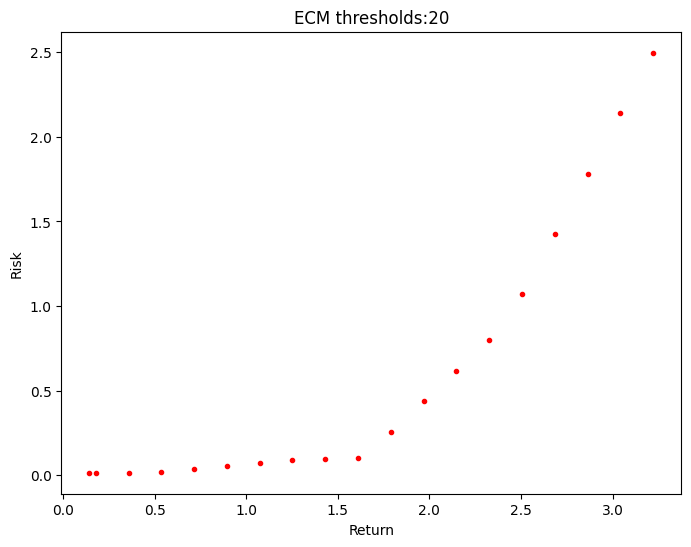

     pcost       dcost       gap    pres   dres
 0:  4.5335e-03 -1.0433e+00  1e+00  0e+00  7e+00
 1:  3.9994e-03 -2.5832e-02  3e-02  6e-17  2e-01
 2:  1.5429e-03 -4.3379e-03  6e-03  2e-16  2e-02
 3:  8.4874e-04 -7.8512e-05  9e-04  2e-16  2e-03
 4:  6.5986e-04  3.4501e-04  3e-04  2e-16  1e-16
 5:  6.1996e-04  5.8712e-04  3e-05  7e-17  3e-16
 6:  6.0811e-04  6.0510e-04  3e-06  1e-16  3e-16
 7:  6.0686e-04  6.0680e-04  6e-08  7e-17  3e-16
Optimal solution found.
0.0006068614922996292
     pcost       dcost       gap    pres   dres
 0:  4.4243e-03 -1.0402e+00  1e+00  0e+00  7e+00
 1:  3.9011e-03 -2.5235e-02  3e-02  4e-17  2e-01
 2:  1.5389e-03 -4.2931e-03  6e-03  2e-16  2e-02
 3:  8.3021e-04 -8.1515e-05  9e-04  3e-17  1e-03
 4:  6.6810e-04  4.3319e-04  2e-04  2e-16  1e-04
 5:  6.1850e-04  5.8953e-04  3e-05  5e-17  3e-16
 6:  6.0782e-04  6.0594e-04  2e-06  2e-16  2e-16
 7:  6.0685e-04  6.0681e-04  4e-08  7e-17  1e-16
Optimal solution found.
0.0006068472060904449
     pcost       dcost      

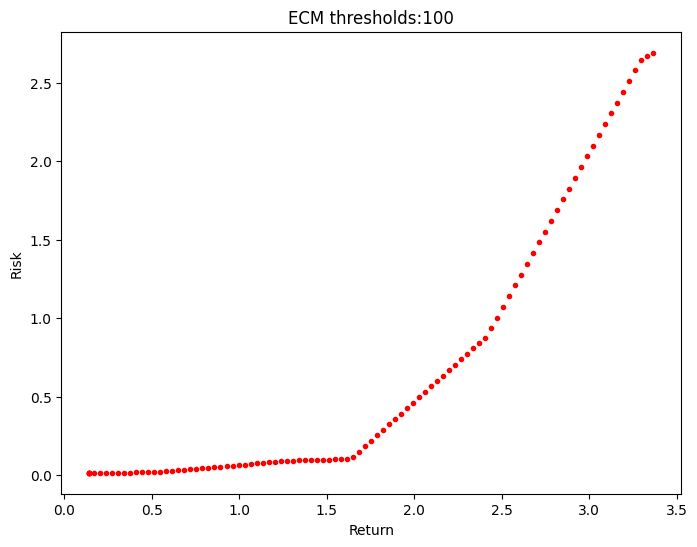

     pcost       dcost       gap    pres   dres
 0:  4.5335e-03 -1.0433e+00  1e+00  0e+00  7e+00
 1:  3.9994e-03 -2.5832e-02  3e-02  6e-17  2e-01
 2:  1.5429e-03 -4.3379e-03  6e-03  2e-16  2e-02
 3:  8.4874e-04 -7.8512e-05  9e-04  2e-16  2e-03
 4:  6.5986e-04  3.4501e-04  3e-04  2e-16  1e-16
 5:  6.1996e-04  5.8712e-04  3e-05  7e-17  3e-16
 6:  6.0811e-04  6.0510e-04  3e-06  1e-16  3e-16
 7:  6.0686e-04  6.0680e-04  6e-08  7e-17  3e-16
Optimal solution found.
0.0006068614922996292
     pcost       dcost       gap    pres   dres
 0:  4.5219e-03 -1.0430e+00  1e+00  2e-16  7e+00
 1:  3.9885e-03 -2.5783e-02  3e-02  5e-17  2e-01
 2:  1.5429e-03 -4.3388e-03  6e-03  6e-17  2e-02
 3:  8.4678e-04 -7.9420e-05  9e-04  7e-17  2e-03
 4:  6.5874e-04  3.6304e-04  3e-04  5e-17  2e-16
 5:  6.1970e-04  5.8845e-04  3e-05  4e-17  3e-16
 6:  6.0805e-04  6.0530e-04  3e-06  1e-16  3e-16
 7:  6.0686e-04  6.0680e-04  6e-08  2e-16  2e-16
Optimal solution found.
0.000606857877975989
     pcost       dcost       

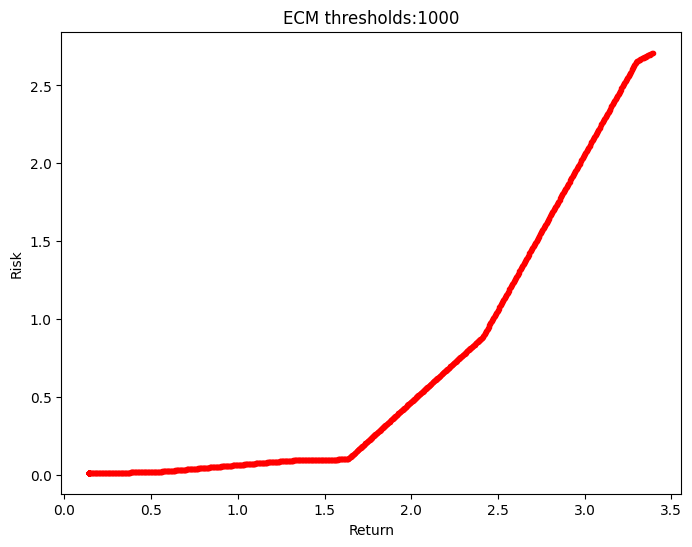

In [59]:
for threshold in [10,20,100,1000]:
    result=[]
    for epsilon in np.linspace(0,3.4,threshold):
        try:
            solLP = ECM(epsilon)
            
            f = list(solLP['x'])
            print(solLP['primal objective'])
            result.append([
                    sum([float(stock_data[i].increase) * f[i] for i in range(len(stock_data))]),
                    sum([sum(risk_matrix[i]) * f[i] for i in range(len(stock_data))]),
                ])
        except:
            pass
    x=[]
    y=[]
    for i in result:
        x.append(i[0])
        y.append(i[1])

    f, ax = plt.subplots(1, 1, figsize=(8, 6))

    ax.plot(x, y, '.r')
    ax.set_title(f"ECM thresholds:{threshold}")
    ax.set_xlabel('Return')
    ax.set_ylabel('Risk')
    plt.show()